In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [40]:
df = pd.read_csv('/content/IPL.csv')


/tmp/ipython-input-57742599.py:1: DtypeWarning: Columns (28,29,30,31,43,46,47,48,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/IPL.csv')


In [41]:
df.head()


,Unnamed: 0,match_id,date,match_type,event_name,innings,batting_team,bowling_team,over,ball,...,team_runs,team_balls,team_wicket,new_batter,batter_runs,batter_balls,bowler_wicket,batting_partners,next_batter,striker_out
0,131970,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,...,1,1,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
1,131971,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,...,1,2,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
2,131972,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,...,2,2,0,NaN,0,1,0,"('BB McCullum', 'SC Ganguly')",NaN,False
3,131973,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,...,2,3,0,NaN,0,2,0,"('BB McCullum', 'SC Ganguly')",NaN,False
4,131974,335982,2008-04-18,T20,Indian Premier League,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,...,2,4,0,NaN,0,3,0,"('BB McCullum', 'SC Ganguly')",NaN,False


In [42]:
df.tail()


,Unnamed: 0,match_id,date,match_type,event_name,innings,batting_team,bowling_team,over,ball,...,team_runs,team_balls,team_wicket,new_batter,batter_runs,batter_balls,bowler_wicket,batting_partners,next_batter,striker_out
278200,277951,1473511,2025-06-03,T20,Indian Premier League,2,Punjab Kings,Royal Challengers Bengaluru,19,2,...,162,116,7,NaN,39,26,0,"('KA Jamieson', 'Shashank Singh')",NaN,False
278201,277952,1473511,2025-06-03,T20,Indian Premier League,2,Punjab Kings,Royal Challengers Bengaluru,19,3,...,168,117,7,NaN,45,27,0,"('KA Jamieson', 'Shashank Singh')",NaN,False
278202,277953,1473511,2025-06-03,T20,Indian Premier League,2,Punjab Kings,Royal Challengers Bengaluru,19,4,...,172,118,7,NaN,49,28,0,"('KA Jamieson', 'Shashank Singh')",NaN,False
278203,277954,1473511,2025-06-03,T20,Indian Premier League,2,Punjab Kings,Royal Challengers Bengaluru,19,5,...,178,119,7,NaN,55,29,0,"('KA Jamieson', 'Shashank Singh')",NaN,False
278204,277955,1473511,2025-06-03,T20,Indian Premier League,2,Punjab Kings,Royal Challengers Bengaluru,19,6,...,184,120,7,NaN,61,30,0,"('KA Jamieson', 'Shashank Singh')",NaN,False


In [43]:
df.shape

(278205, 64)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278205 entries, 0 to 278204
Data columns (total 64 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         278205 non-null  int64  
 1   match_id           278205 non-null  int64  
 2   date               278205 non-null  object 
 3   match_type         278205 non-null  object 
 4   event_name         278205 non-null  object 
 5   innings            278205 non-null  int64  
 6   batting_team       278205 non-null  object 
 7   bowling_team       278205 non-null  object 
 8   over               278205 non-null  int64  
 9   ball               278205 non-null  int64  
 10  ball_no            278205 non-null  float64
 11  batter             278205 non-null  object 
 12  bat_pos            278205 non-null  int64  
 13  runs_batter        278205 non-null  int64  
 14  balls_faced        278205 non-null  int64  
 15  bowler             278205 non-null  object 
 16  va

In [45]:
df.columns

Index(['Unnamed: 0', 'match_id', 'date', 'match_type', 'event_name', 'innings',
       'batting_team', 'bowling_team', 'over', 'ball', 'ball_no', 'batter',
       'bat_pos', 'runs_batter', 'balls_faced', 'bowler', 'valid_ball',
       'runs_extras', 'runs_total', 'runs_bowler', 'runs_not_boundary',
       'extra_type', 'non_striker', 'non_striker_pos', 'wicket_kind',
       'player_out', 'fielders', 'runs_target', 'review_batter',
       'team_reviewed', 'review_decision', 'umpire', 'umpires_call',
       'player_of_match', 'match_won_by', 'win_outcome', 'toss_winner',
       'toss_decision', 'venue', 'city', 'day', 'month', 'year', 'season',
       'gender', 'team_type', 'superover_winner', 'result_type', 'method',
       'balls_per_over', 'overs', 'event_match_no', 'stage', 'match_number',
       'team_runs', 'team_balls', 'team_wicket', 'new_batter', 'batter_runs',
       'batter_balls', 'bowler_wicket', 'batting_partners', 'next_batter',
       'striker_out'],
      dtype='object')

In [46]:
df.columns = (
    df.columns
    .str.lower()
    .str.strip()
    .str.replace(' ', '_')
)


In [47]:
df.columns


Index(['unnamed:_0', 'match_id', 'date', 'match_type', 'event_name', 'innings',
       'batting_team', 'bowling_team', 'over', 'ball', 'ball_no', 'batter',
       'bat_pos', 'runs_batter', 'balls_faced', 'bowler', 'valid_ball',
       'runs_extras', 'runs_total', 'runs_bowler', 'runs_not_boundary',
       'extra_type', 'non_striker', 'non_striker_pos', 'wicket_kind',
       'player_out', 'fielders', 'runs_target', 'review_batter',
       'team_reviewed', 'review_decision', 'umpire', 'umpires_call',
       'player_of_match', 'match_won_by', 'win_outcome', 'toss_winner',
       'toss_decision', 'venue', 'city', 'day', 'month', 'year', 'season',
       'gender', 'team_type', 'superover_winner', 'result_type', 'method',
       'balls_per_over', 'overs', 'event_match_no', 'stage', 'match_number',
       'team_runs', 'team_balls', 'team_wicket', 'new_batter', 'batter_runs',
       'batter_balls', 'bowler_wicket', 'batting_partners', 'next_batter',
       'striker_out'],
      dtype='object')

In [48]:
for col in df.columns:
    print(col)


unnamed:_0
match_id
date
match_type
event_name
innings
batting_team
bowling_team
over
ball
ball_no
batter
bat_pos
runs_batter
balls_faced
bowler
valid_ball
runs_extras
runs_total
runs_bowler
runs_not_boundary
extra_type
non_striker
non_striker_pos
wicket_kind
player_out
fielders
runs_target
review_batter
team_reviewed
review_decision
umpire
umpires_call
player_of_match
match_won_by
win_outcome
toss_winner
toss_decision
venue
city
day
month
year
season
gender
team_type
superover_winner
result_type
method
balls_per_over
overs
event_match_no
stage
match_number
team_runs
team_balls
team_wicket
new_batter
batter_runs
batter_balls
bowler_wicket
batting_partners
next_batter
striker_out


In [49]:

if 'player' not in df.columns:
    for col in ['batsman', 'striker', 'player_name', 'batter']:
        if col in df.columns:
            df['player'] = df[col]
            break

if 'player' not in df.columns:
    df['player'] = 'Unknown'


In [50]:

if 'runs' not in df.columns:
    for col in ['batsman_runs', 'runs_scored', 'total_runs', 'runs_off_bat']:
        if col in df.columns:
            df['runs'] = df[col]
            break

if 'runs' not in df.columns:
    df['runs'] = 0


In [51]:

match_col = None
for col in ['match_id', 'id', 'match', 'matchid']:
    if col in df.columns:
        match_col = col
        break

if match_col is None:
    df['match_id'] = df.index
    match_col = 'match_id'


In [52]:
player_match = (
    df.groupby(['player', match_col])
      .agg(
          runs=('runs', 'sum'),
          balls=('runs', 'count')
      )
      .reset_index()
)

player_match.head()


,player,match_id,runs,balls
0,A Ashish Reddy,548346,0,10
1,A Ashish Reddy,548352,0,3
2,A Ashish Reddy,548359,0,8
3,A Ashish Reddy,548373,0,4
4,A Ashish Reddy,548376,0,5


In [53]:
player_match['strike_rate'] = (
    player_match['runs'] / player_match['balls']
) * 100


In [54]:
player_match = player_match[player_match['balls'] > 0]


## Analytical Questions
1. Who are the top run scorers in IPL?
2. How does strike rate vary among players?
3. Which players are more consistent?
4. Can recent performance predict runs?


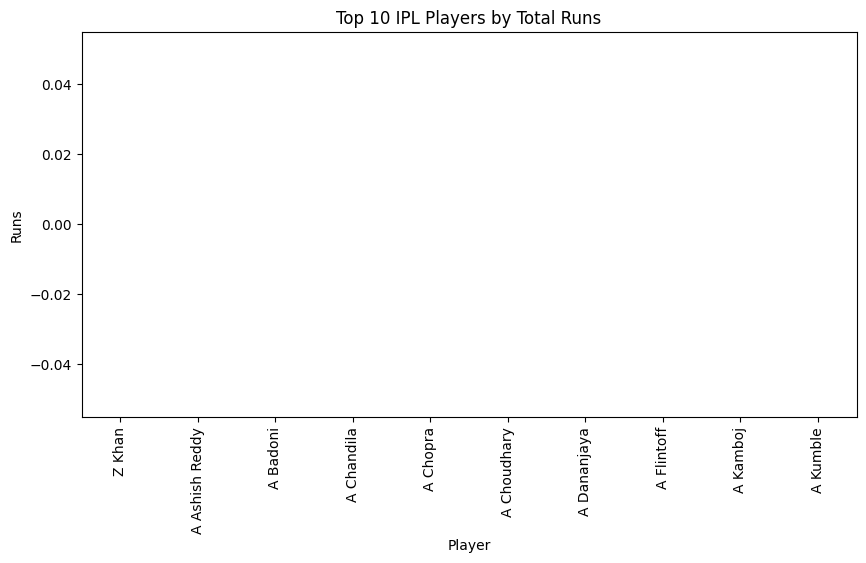

In [55]:
top_players = (
    player_match.groupby('player')['runs']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
top_players.plot(kind='bar')
plt.title('Top 10 IPL Players by Total Runs')
plt.ylabel('Runs')
plt.xlabel('Player')
plt.show()


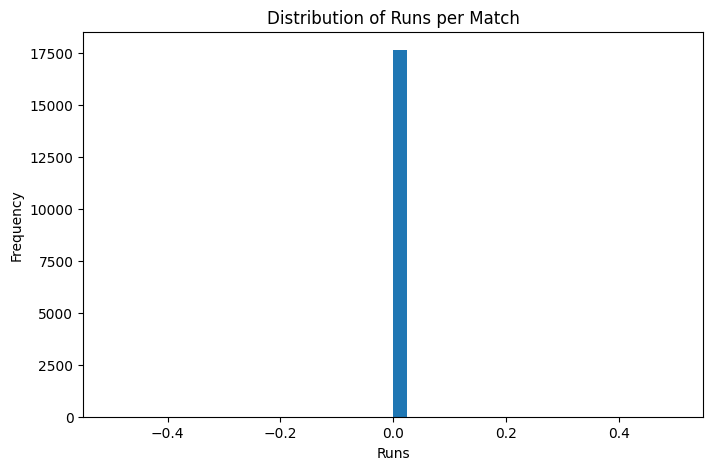

In [56]:
plt.figure(figsize=(8,5))
plt.hist(player_match['runs'], bins=40)
plt.title('Distribution of Runs per Match')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()


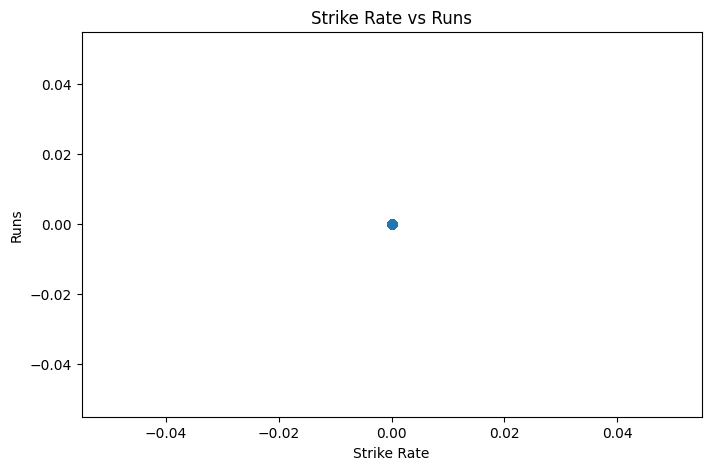

In [57]:
plt.figure(figsize=(8,5))
plt.scatter(player_match['strike_rate'], player_match['runs'], alpha=0.5)
plt.xlabel('Strike Rate')
plt.ylabel('Runs')
plt.title('Strike Rate vs Runs')
plt.show()


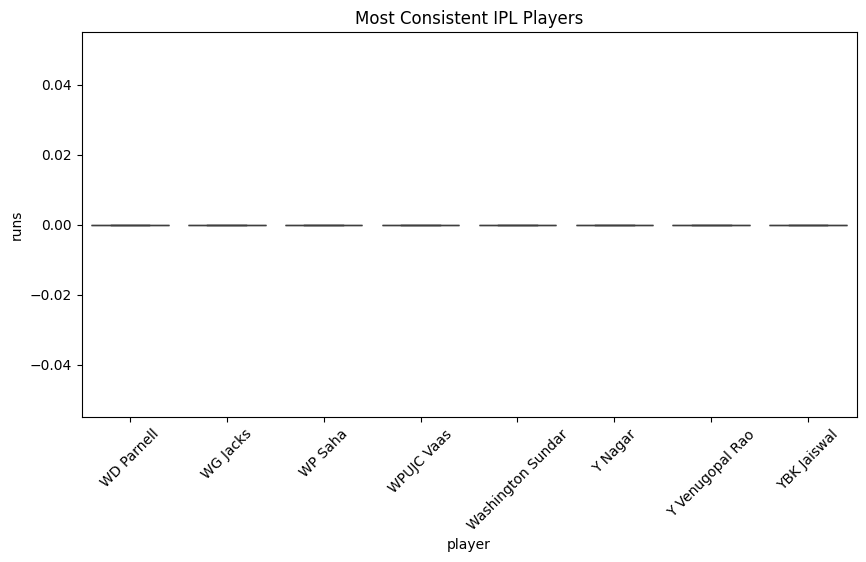

In [58]:
consistency = (
    player_match.groupby('player')['runs']
    .std()
    .sort_values()
    .head(8)
)

plt.figure(figsize=(10,5))
sns.boxplot(
    x=player_match[player_match['player'].isin(consistency.index)]['player'],
    y=player_match[player_match['player'].isin(consistency.index)]['runs']
)
plt.xticks(rotation=45)
plt.title('Most Consistent IPL Players')
plt.show()


In [59]:
player_match['recent_avg_runs'] = (
    player_match.groupby('player')['runs']
    .rolling(5)
    .mean()
    .reset_index(0, drop=True)
)


In [60]:
player_match = player_match.dropna()


In [61]:
X = player_match[['recent_avg_runs', 'strike_rate']]
y = player_match['runs']


In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [63]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [64]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 0.0
RMSE: 0.0
R2 Score: 1.0


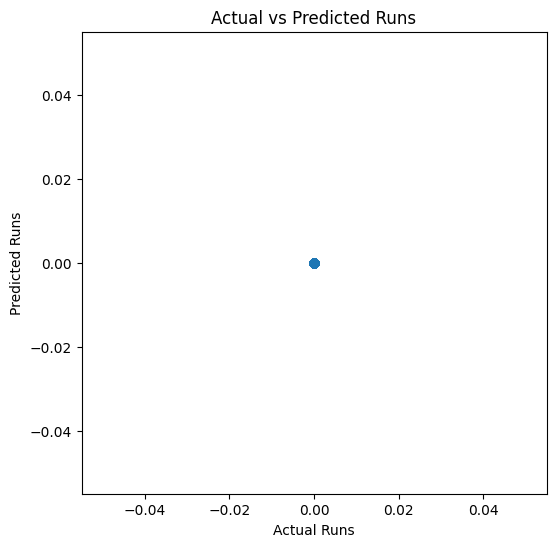

In [65]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.title('Actual vs Predicted Runs')
plt.show()


In [66]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

importance


,Feature,Coefficient
0,recent_avg_runs,0.0
1,strike_rate,0.0


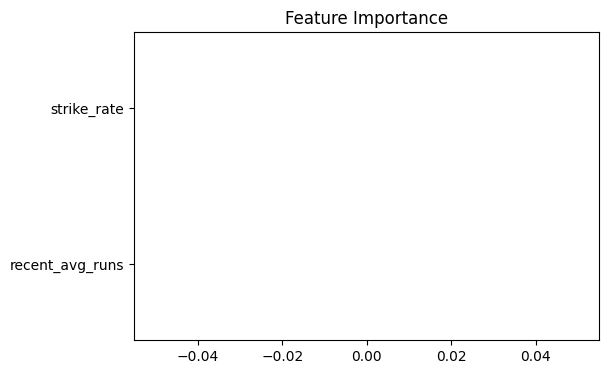

In [67]:
plt.figure(figsize=(6,4))
plt.barh(importance['Feature'], importance['Coefficient'])
plt.title('Feature Importance')
plt.show()


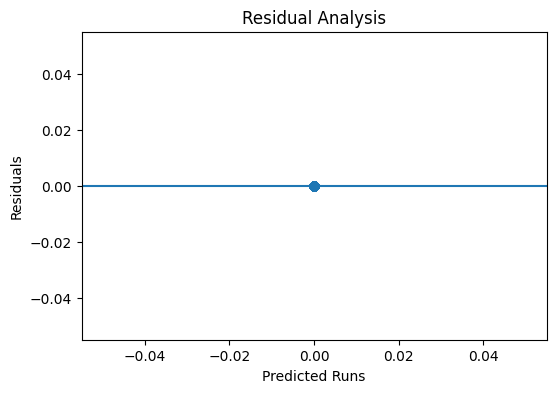

In [68]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel('Predicted Runs')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()


## Conclusion
This project analyzed IPL player performance using real ball-by-ball data.
Exploratory data analysis and visualization helped identify top performers and
consistent players. A machine learning model was built to predict runs based
on recent form and strike rate, making the analysis both insightful and deployable.
